In [1]:
from exp.nb_Tesis import * 

In [2]:
input = torch.rand([16,3,123,123])

In [3]:
torch.nn.AdaptiveAvgPool1d(1)(input).shape

RuntimeError: Expected 3-dimensional tensor, but got 4-dimensional tensor for argument #1 'self' (while checking arguments for adaptive_avg_pool1d)

In [ ]:
%psource nn.AdaptiveAvgPool

In [4]:
%psource AdaptiveConcatPool2d

In [5]:
class AdaptiveAvgMaxMinPool2d(Module):
    "Layer that concats `AdaptiveAvgPool2d` and `AdaptiveMaxPool2d`."
    def __init__(self, sz:Optional[int]=None):
        "Output will be 2*sz or 2 if sz is None"
        self.output_size = sz or 1
        self.avg_p = nn.AdaptiveAvgPool2d(self.output_size)
        self.max_p = nn.AdaptiveMaxPool2d(self.output_size)
        self.min_p = nn.AdaptiveMaxPool2d(self.output_size)
        
    def forward(self, x): return torch.cat([self.avg_p(x), self.max_p(x), self.min_p(-x) * -1 ], 1)

In [6]:
class ChannelConcatPooling(Module):
    def forward(self, x): 
        return torch.cat([torch.max(x,1,keepdim=True)[0], 
                         torch.mean(x,1,keepdim=True),
                         torch.min(-x,1,keepdim=True)[0]], 1)

In [45]:
x = torch.rand(16,5,123,123)

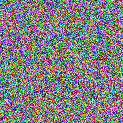

In [48]:
transforms.ToPILImage()(x[0])

In [58]:
B = ChannelConcatPooling()(x)

In [59]:
B.shape

torch.Size([16, 3, 123, 123])

In [50]:
A = AdaptiveAvgMaxMinPool2d()(x)

In [51]:
G = (torch.cat([x,x,x],1) * A)

In [69]:
cocient = math.floor(G.shape[1] / B.shape[1]); cocient
remainder = G.shape[1] % B.shape[1]; remainder

0

In [83]:
768 % 12

0

In [87]:
B[:,:12,:,:].shape

torch.Size([16, 3, 123, 123])

In [77]:
B.repeat(1,2,1,1).shape

torch.Size([16, 6, 123, 123])

In [67]:
B_ext = torch.repeat_interleave(B,cocient,dim=1)

In [53]:
m = B_ext * G

In [54]:
m.shape

torch.Size([16, 15, 123, 123])

In [55]:
out = m.view(m.shape[0], 5, 3, *m.shape[2:]).sum(dim=2)

In [56]:
out.shape

torch.Size([16, 5, 123, 123])

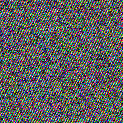

In [57]:
transforms.ToPILImage()(out[0])